In [253]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
# from torchvision import tranforms
import numpy as np
import cv2 as cv

In [254]:
# Open .tif file
tif_image = Image.open(r"C:\Users\shrey\Documents\LIR_Project\tif_files_our_data\15.tif")
tif_image.show()
type(tif_image)

PIL.TiffImagePlugin.TiffImageFile

In [255]:
tif_image_np = np.array(tif_image)
type(tif_image_np)
img_min = np.min(tif_image_np)
img_max = np.max(tif_image_np)

print(img_min)
print(img_max)
tif_image_np = (tif_image_np - np.min(tif_image_np)) / (np.max(tif_image_np) - np.min(tif_image_np))
tif_image_np.shape

36
199


(240, 424)

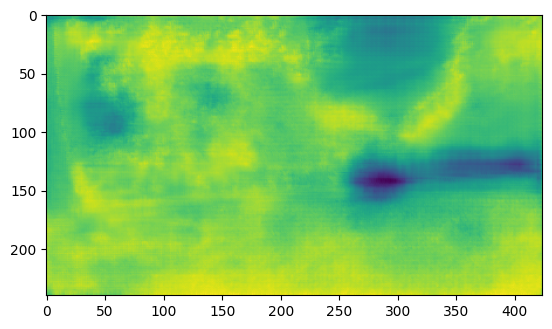

In [256]:
plt.imshow(tif_image_np)

In [257]:
# Contour Center
img_min = np.min(tif_image_np)
img_max = np.max(tif_image_np)

print(img_min)
print(img_max)

0.0
1.0


In [258]:
# path = r"C:\Users\shrey\Documents\LIR_Project\ANEU\mu_ts_2021_11_09_16h15m31s_000038.tif"
path = r"C:\Users\shrey\Documents\LIR_Project\tif_files_our_data\14.tif"
src = cv.imread(path)
gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
blurred = cv.GaussianBlur(gray, (5, 5), 0)
thresh = cv.threshold(blurred, 60, 255, cv.THRESH_BINARY)[1]
print(thresh.shape)

(240, 424)


In [259]:
contours, heirarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
blank = np.zeros(thresh.shape, dtype='uint8')

cv.drawContours(blank, contours, -1, (255,0,0), 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       ...,
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [260]:
centroids = []
# Append the point on image
centroids.append((212, 240))

for i in contours:
	M = cv.moments(i)
	if M['m00'] != 0:
		cx = int(M['m10']/M['m00'])
		cy = int(M['m01']/M['m00'])
		cv.drawContours(src, [i], -1, (0, 255, 0), 2)
		cv.circle(src, (cx, cy), 7, (0, 0, 255), -1)
		cv.putText(src, "center", (cx - 20, cy - 20),
				cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
		centroids.append((cx, cy))

In [261]:
cv.imshow("Image", src)
cv.waitKey(0)

-1

[(212, 240), (231, 215), (250, 190), (269, 165), (288, 141)]
[(288, 141), (268, 135), (249, 130), (230, 124), (211, 119)]


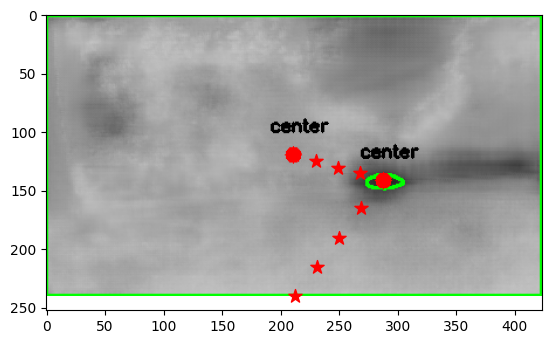

In [262]:
# Plot the image
plt.imshow(cv.cvtColor(src, cv.COLOR_BGR2RGB))

# Get the Trajectories
def create_waypoints(point1, point2, num_waypoints = 5):
    x1, y1 = point1
    x2, y2 = point2
    x_values = np.linspace(x1, x2, num_waypoints)
    y_values = np.linspace(y1, y2, num_waypoints)

    # Create a list of tuples representing the waypoints
    waypoints = [(int(x), int(y)) for x, y in zip(x_values, y_values)]
    return waypoints

for i in range(len(centroids)-1):
    waypoints = create_waypoints(centroids[i], centroids[i+1])
    print(waypoints)
    # Plot the waypoints as stars
    for point in waypoints:
        plt.scatter(point[0], point[1], marker='*', color='red', s=100)

# Show the plot
plt.show()